In [30]:
#imports
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns


In [31]:
# Load sleep data
sleep_data = pd.read_csv('sleep-data.csv', delimiter=';')

# Convert datetime columns to proper datetime objects
sleep_data['Went to bed'] = pd.to_datetime(sleep_data['Went to bed'])
sleep_data['Woke up'] = pd.to_datetime(sleep_data['Woke up'])

# Load watch history JSON
with open('watch-history.json', 'r', encoding='utf-8') as f:
    watch_history = json.load(f)

# Parse watch history into a DataFrame
watch_history_data = []
for entry in watch_history:
    try:
        watch_time = datetime.strptime(entry['time'], '%Y-%m-%dT%H:%M:%S.%fZ')
    except ValueError:
        try:
            watch_time = datetime.strptime(entry['time'], '%Y-%m-%dT%H:%M:%SZ')
        except ValueError:
            print(f"Unrecognized time format: {entry['time']}")
            continue
    title = entry['title']
    platform = entry['header']
    watch_history_data.append({'Time': watch_time, 'Title': title, 'Platform': platform})

watch_df = pd.DataFrame(watch_history_data)

# Merge datasets
# Find the closest watch time before sleep
merged_data = []
for index, row in sleep_data.iterrows():
    sleep_start = row['Went to bed']
    relevant_watches = watch_df[watch_df['Time'] < sleep_start]
    if not relevant_watches.empty:
        last_watch = relevant_watches.iloc[-1]
        merged_data.append({
            'Sleep Start': sleep_start,
            'Sleep Quality': row['Sleep Quality'],
            'Time in bed (seconds)': row['Time in bed (seconds)'],
            'Time asleep (seconds)': row['Time asleep (seconds)'],
            'Last Watch Time': last_watch['Time'],
            'Last Watch Title': last_watch['Title'],
            'Platform': last_watch['Platform']
        })

merged_df = pd.DataFrame(merged_data)

# Convert Sleep Quality to numeric for analysis
merged_df['Sleep Quality'] = merged_df['Sleep Quality'].str.rstrip('%').astype(float)

# Visualization: Scatter plot of watch time vs. sleep quality
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Last Watch Time'], merged_df['Sleep Quality'], alpha=0.7)
plt.xlabel('Last Watch Time')
plt.ylabel('Sleep Quality (%)')
plt.title('Effect of Watch Time on Sleep Quality')
plt.xticks(rotation=45)
plt.grid()
plt.show()

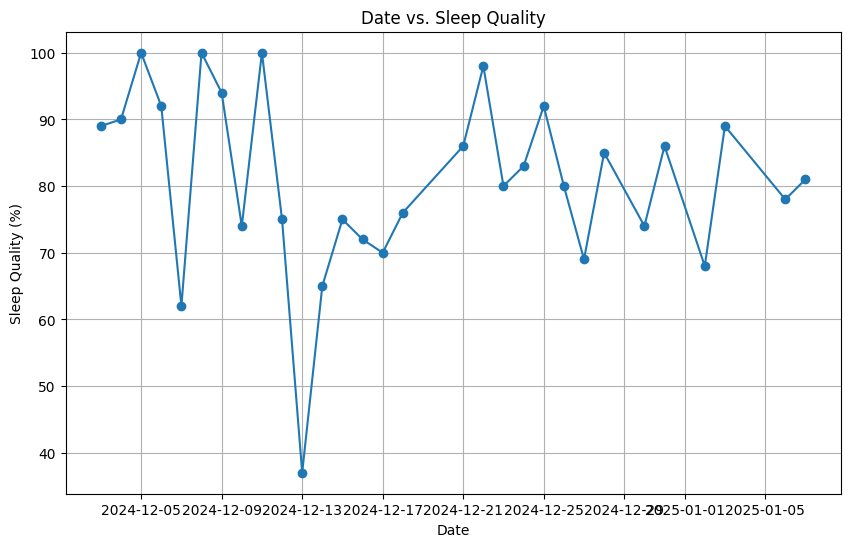

In [32]:
# Load sleep data
#sleep_data = pd.read_csv('/mnt/data/My complete sleep data.csv', delimiter=';')
sleep_data = pd.read_csv('sleep-data.csv', delimiter=';')
# Convert datetime columns to proper datetime objects
sleep_data['Went to bed'] = pd.to_datetime(sleep_data['Went to bed'])
sleep_data['Woke up'] = pd.to_datetime(sleep_data['Woke up'])

# Ensure sleep quality is numeric
sleep_data['Sleep Quality'] = sleep_data['Sleep Quality'].str.replace('%', '').astype(float)

# Extract date from 'Went to bed'
sleep_data['Date'] = sleep_data['Went to bed'].dt.date

# Load watch history JSON
#with open('/mnt/data/watch-history 2.json', 'r', encoding='utf-8') as f:
    #watch_history = json.load(f)
with open('watch-history.json', 'r', encoding='utf-8') as f:
    watch_history = json.load(f)
# Convert watch history into a DataFrame and process timestamps
watch_data = pd.DataFrame(watch_history)

# Use format='mixed' to handle mixed datetime formats
watch_data['time'] = pd.to_datetime(watch_data['time'], format='mixed', errors='coerce')

# Drop rows where time conversion failed
watch_data = watch_data.dropna(subset=['time'])

# Extract date and hour
watch_data['date'] = watch_data['time'].dt.date
watch_data['hour'] = watch_data['time'].dt.hour

# 1. Plot Date vs. Sleep Quality
plt.figure(figsize=(10, 6))
plt.plot(sleep_data['Date'], sleep_data['Sleep Quality'], marker='o', linestyle='-')
plt.title('Date vs. Sleep Quality')
plt.xlabel('Date')
plt.ylabel('Sleep Quality (%)')
plt.grid()
plt.show()


In [70]:
sleep_data.head()

,Went to bed,Woke up,Sleep Quality,Time in bed (seconds),Time asleep (seconds),Asleep after (seconds),Regularity,Did snore,Snore time (seconds),Coughing (per hour),City,Alertness score,Alertness reaction time (seconds),Alertness accuracy,Movements per hour,Wake up window start,Wake up window stop,Date,date,Late Night Video Watched
0,2024-12-03 00:55:33,2024-12-03 09:35:28,89.0,31194,29114,2079,—,False,0,0.0,NaN,NaN,NaN,NaN,1.987158,NaN,NaN,2024-12-03,NaN,0.0
1,2024-12-04 01:52:07,2024-12-04 10:35:55,90.0,31427,29018,1047,84%,False,0,0.0,NaN,87%,"0,653",90%,1.962009,NaN,NaN,2024-12-04,2024-12-04,1.0
2,2024-12-05 02:08:20,2024-12-05 10:51:38,100.0,31398,28572,1360,90%,False,0,0.0,NaN,NaN,NaN,NaN,1.642728,NaN,NaN,2024-12-05,NaN,0.0
3,2024-12-06 02:16:03,2024-12-06 11:11:52,92.0,32149,29898,642,92%,False,0,0.0,NaN,NaN,NaN,NaN,1.068012,NaN,NaN,2024-12-06,2024-12-06,13.0
4,2024-12-07 02:09:58,2024-12-07 10:16:20,62.0,29182,25193,2820,94%,False,0,0.0,NaN,NaN,NaN,NaN,2.469403,NaN,NaN,2024-12-07,2024-12-07,23.0


In [90]:
# Perform data cleaning for sleep_data
# Get the following fields date Use Sleep Quality, Time in bed(seconds), Time asleep (seconds), Regularity, Asleep after (seconds), Movements per hour
sleep_data_cleaned = sleep_data[['Date', 'Sleep Quality', 'Time in bed (seconds)', 'Time asleep (seconds)', 'Regularity', 'Asleep after (seconds)', 'Movements per hour']]
sleep_data_cleaned['Regularity'] = sleep_data_cleaned['Regularity'].replace({'—': np.nan, '%': ''}, regex=True)

# Drop rows with NaN in the 'Regularity' column or handle them appropriately
sleep_data_cleaned['Regularity'] = pd.to_numeric(sleep_data_cleaned['Regularity'], errors='coerce')

# Convert percentage values to decimal (e.g., 90 -> 0.9)
sleep_data_cleaned['Regularity'] = sleep_data_cleaned['Regularity'] / 100

# If you want to drop rows with NaN in 'Regularity' after conversion
sleep_data_cleaned = sleep_data_cleaned.dropna(subset=['Regularity'])

# Display the cleaned dataset
sleep_data_cleaned.head()



C:\Users\Can Zunal\AppData\Local\Temp\ipykernel_31096\1761819576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data_cleaned['Regularity'] = sleep_data_cleaned['Regularity'].replace({'—': np.nan, '%': ''}, regex=True)
C:\Users\Can Zunal\AppData\Local\Temp\ipykernel_31096\1761819576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data_cleaned['Regularity'] = pd.to_numeric(sleep_data_cleaned['Regularity'], errors='coerce')
C:\Users\Can Zunal\AppData\Local\Temp\ipykernel_31096\1761819576.p

,Date,Sleep Quality,Time in bed (seconds),Time asleep (seconds),Regularity,Asleep after (seconds),Movements per hour
1,2024-12-04,90.0,31427,29018,0.84,1047,1.962009
2,2024-12-05,100.0,31398,28572,0.90,1360,1.642728
3,2024-12-06,92.0,32149,29898,0.92,642,1.068012
4,2024-12-07,62.0,29182,25193,0.94,2820,2.469403
5,2024-12-08,100.0,30159,28651,0.90,1507,0.634073


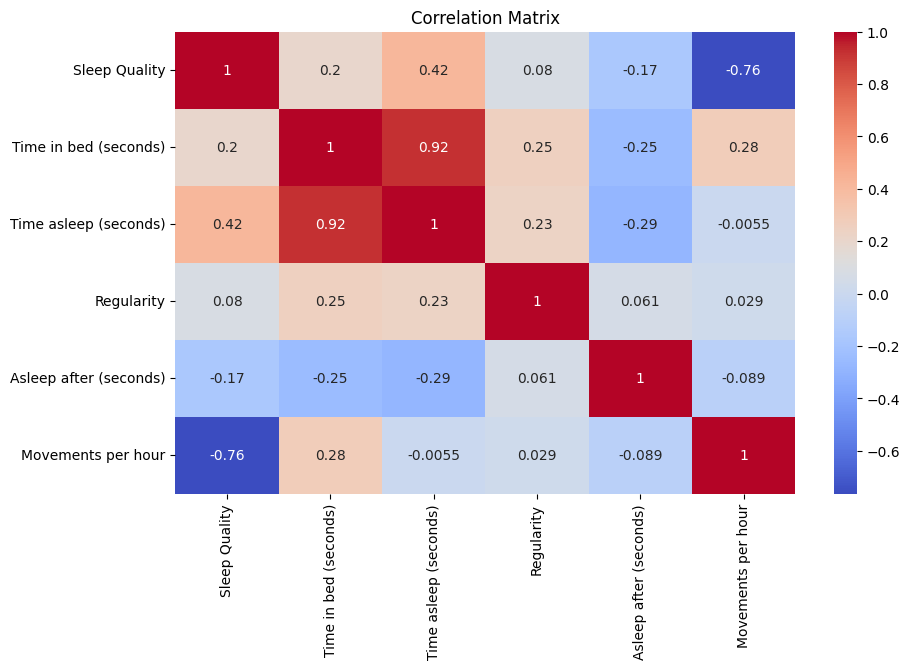

In [92]:
# Create heatmap using sleep_data_cleaned with fields Sleep Quality, Time in bed(seconds), Time asleep (seconds), Regularity, Asleep after (seconds), Movements per hour

# Create a correlation matrix
sleep_data_heatmap = sleep_data_cleaned[['Sleep Quality', 'Time in bed (seconds)', 'Time asleep (seconds)', 'Regularity', 'Asleep after (seconds)', 'Movements per hour']]
corr = sleep_data_heatmap.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [71]:
watch_data.head()

,header,title,titleUrl,subtitles,time,products,activityControls,date,hour,period
0,YouTube Music,Watched Training Season (Live from the Royal A...,https://music.youtube.com/watch?v=2tw2QDSeBQQ,"[{'name': 'Dua Lipa - Topic', 'url': 'https://...",2025-01-08 09:33:52.286000+00:00,[YouTube],[YouTube watch history],2025-01-08,9,morning
1,YouTube,Watched Alperen Şengün | Houston Rockets ⚔️ W...,https://www.youtube.com/watch?v=KKJxVZmuvXY,"[{'name': 'Zelimir HBK *', 'url': 'https://www...",2025-01-08 08:43:00.524000+00:00,[YouTube],[YouTube watch history],2025-01-08,8,morning
2,YouTube,"Watched She played his PSYCHOTIC game, and no ...",https://www.youtube.com/watch?v=DCQ6jq5mcDM,"[{'name': 'MrBallen', 'url': 'https://www.yout...",2025-01-07 11:15:26.151000+00:00,[YouTube],[YouTube watch history],2025-01-07,11,afternoon
3,YouTube,Watched Ataberk Doğan | Madara Olduk #430 İzliyor,https://www.youtube.com/watch?v=gW_bjbJGfT0,"[{'name': 'Madara Olduk', 'url': 'https://www....",2025-01-07 09:09:15.972000+00:00,[YouTube],[YouTube watch history],2025-01-07,9,morning
4,YouTube,Watched The worst death story on the internet,https://www.youtube.com/watch?v=sx14YtiLFIM,"[{'name': 'MrBallen', 'url': 'https://www.yout...",2025-01-07 09:03:36.248000+00:00,[YouTube],[YouTube watch history],2025-01-07,9,morning


In [94]:
# Adjust the bins for time periods to include 10 PM to 4 AM as "night"
"""
Night: 10 PM to 4 AM
Morning: 4 AM to 11 AM
Afternoon: 11 AM to 5 PM
Evening: 5 PM to 10 PM
"""
watch_data['hour'] = watch_data['time'].dt.hour
watch_data['period'] = pd.cut(
    watch_data['hour'], 
    bins=[-1, 4, 11, 17, 22, 24], 
    labels=['night', 'morning', 'afternoon', 'evening', 'night'], 
    right=False, 
    ordered=False
)

# Handle the case where hours wrap around at midnight
watch_data['period'] = watch_data['period'].replace({'night': 'night'}).fillna('night')

# Calculate total watch time per day for different time periods
watch_data_daily_periods = watch_data.groupby(['date', 'period']).size().unstack(fill_value=0).reset_index()

# Merge the new period-based data with daily totals
watch_data_daily = watch_data.groupby('date').size().reset_index(name='count')
watch_data_daily = watch_data_daily.merge(watch_data_daily_periods, on='date', how='left')

# Convert all period columns to integers
periods = ['night', 'morning', 'afternoon', 'evening']
for period in periods:
    if period in watch_data_daily.columns:
        watch_data_daily[period] = watch_data_daily[period].astype(int)

# Merge sleep and watch data
merged_data = sleep_data_cleaned.merge(watch_data_daily, left_on='Date', right_on='date', how='left')
merged_data.head()

C:\Users\Can Zunal\AppData\Local\Temp\ipykernel_31096\1005514119.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  watch_data_daily_periods = watch_data.groupby(['date', 'period']).size().unstack(fill_value=0).reset_index()


,Date,Sleep Quality,Time in bed (seconds),Time asleep (seconds),Regularity,Asleep after (seconds),Movements per hour,date,count,afternoon,evening,morning,night
0,2024-12-04,90.0,31427,29018,0.84,1047,1.962009,2024-12-04,30,6,4,19,1
1,2024-12-05,100.0,31398,28572,0.90,1360,1.642728,2024-12-05,228,144,28,56,0
2,2024-12-06,92.0,32149,29898,0.92,642,1.068012,2024-12-06,108,55,16,24,13
3,2024-12-07,62.0,29182,25193,0.94,2820,2.469403,2024-12-07,95,5,9,58,23
4,2024-12-08,100.0,30159,28651,0.90,1507,0.634073,2024-12-08,49,5,22,21,1


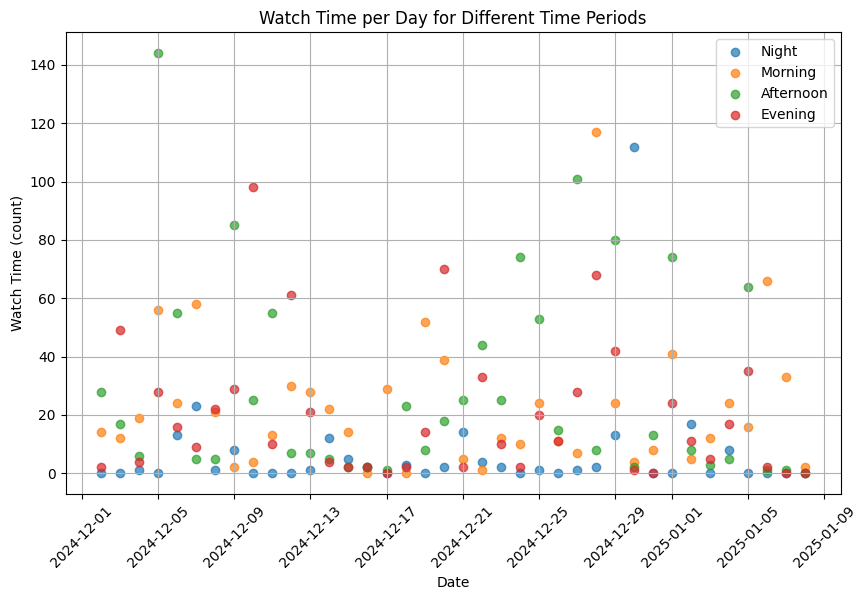

In [95]:
# Create a scatter plot of watch time per day for different time periods
plt.figure(figsize=(10, 6))
plt.scatter(watch_data_daily['date'], watch_data_daily['night'], label='Night', alpha=0.7)
plt.scatter(watch_data_daily['date'], watch_data_daily['morning'], label='Morning', alpha=0.7)
plt.scatter(watch_data_daily['date'], watch_data_daily['afternoon'], label='Afternoon', alpha=0.7)
plt.scatter(watch_data_daily['date'], watch_data_daily['evening'], label='Evening', alpha=0.7)
plt.title('Watch Time per Day for Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Watch Time (count)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

<Figure size 1200x800 with 0 Axes>

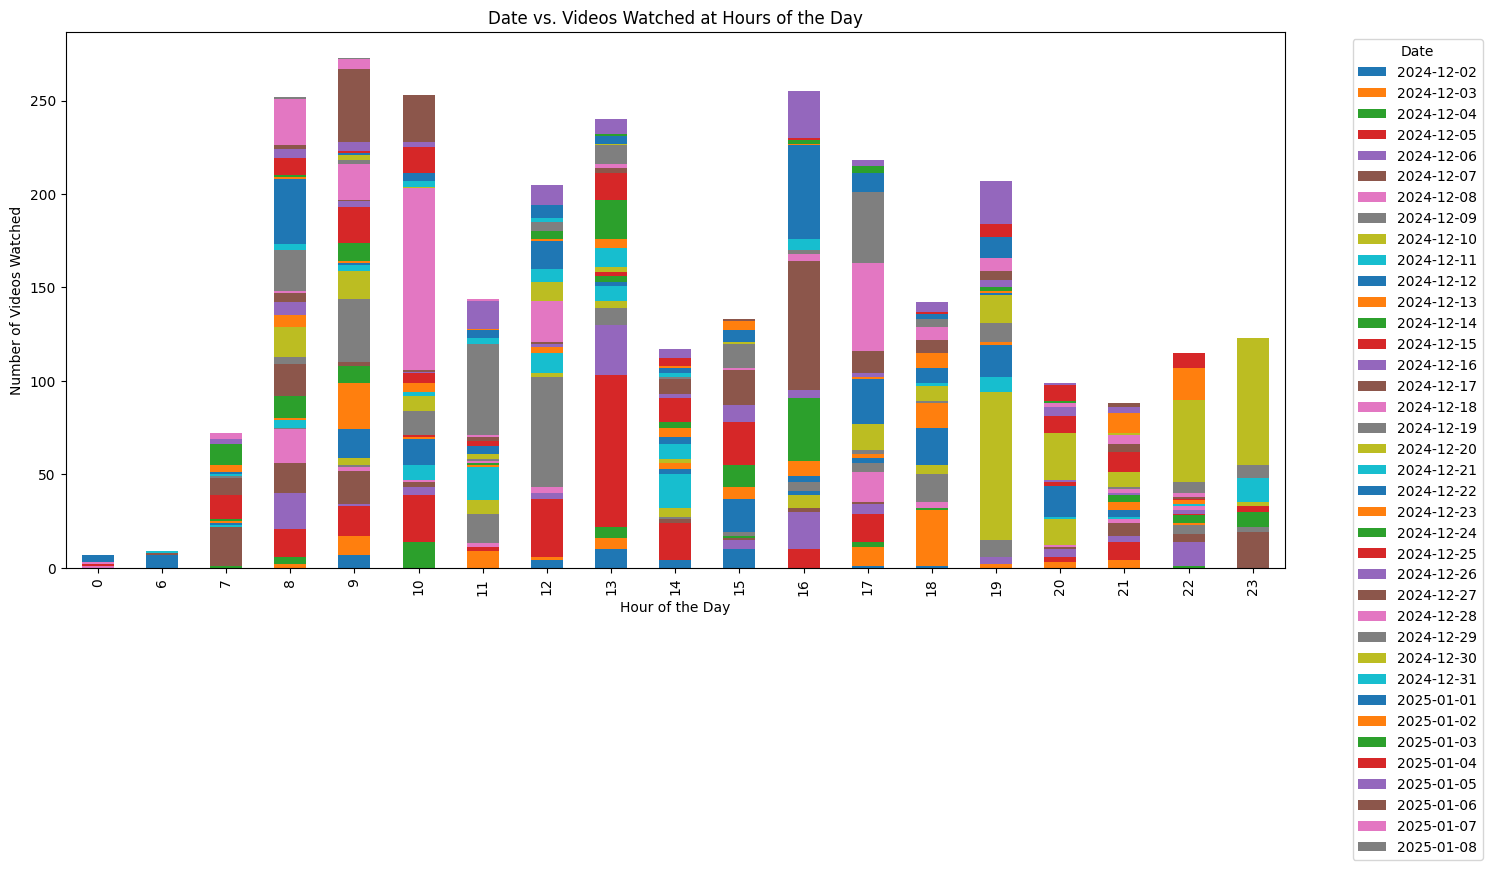

In [33]:
# 2. Plot Date vs. Videos Watched at Hours of the Day
watch_count_by_hour = watch_data.groupby(['date', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
watch_count_by_hour.T.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Date vs. Videos Watched at Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos Watched')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



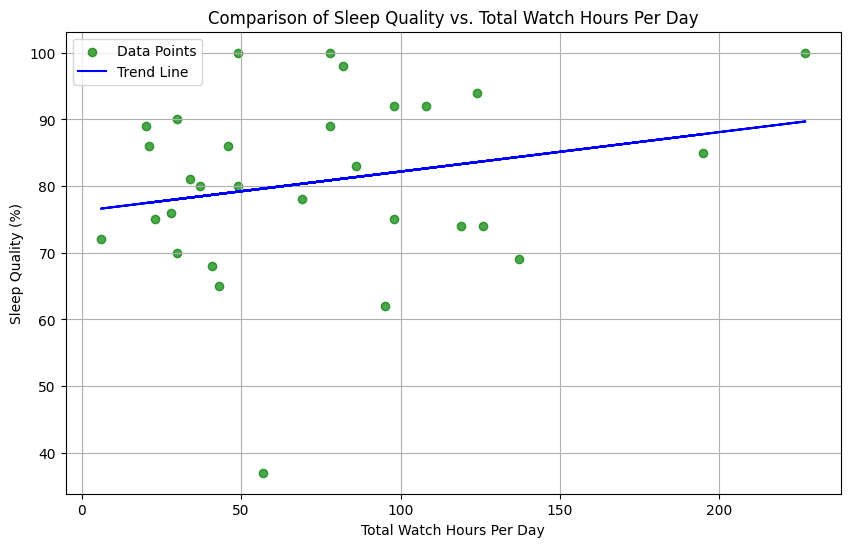

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(sleep_data['Total Watch Hours'], sleep_data['Sleep Quality'], alpha=0.7, color='green', label='Data Points')

# Line plot (trend line)
z = np.polyfit(sleep_data['Total Watch Hours'], sleep_data['Sleep Quality'], 1)
p = np.poly1d(z)
plt.plot(sleep_data['Total Watch Hours'], p(sleep_data['Total Watch Hours']), color='blue', label='Trend Line')

plt.xlabel('Total Watch Hours Per Day')
plt.ylabel('Sleep Quality (%)')
plt.title('Comparison of Sleep Quality vs. Total Watch Hours Per Day')
plt.legend()
plt.grid()
plt.show()

C:\Users\Can Zunal\AppData\Local\Temp\ipykernel_31096\2669110486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_night_watches['videos_watched'] = 1  # Assume 1 hour per video


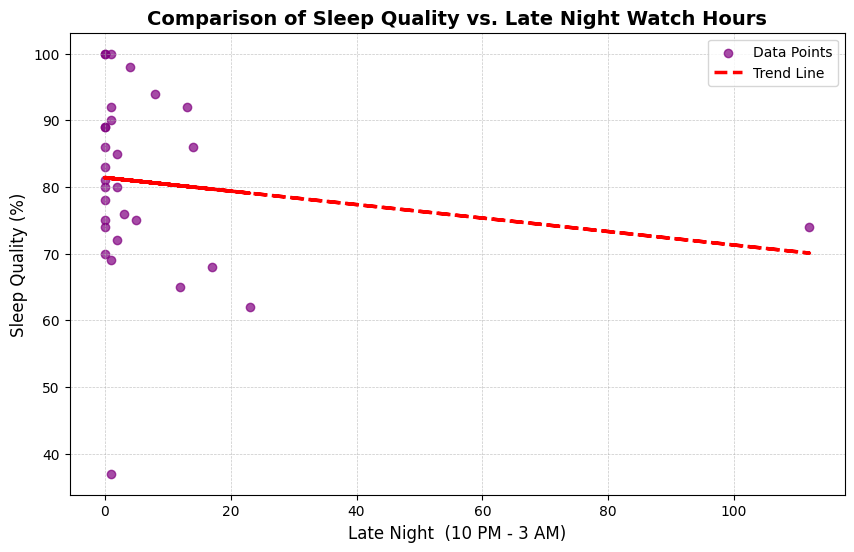

In [35]:
# Filter watch data for videos watched between 10 PM and 3 AM
late_night_watches = watch_data[(watch_data['hour'] >= 22) | (watch_data['hour'] < 3)]

# Calculate total watch time (in hours) for late-night videos per day
late_night_watches['videos_watched'] = 1  # Assume 1 hour per video
late_night_watch_time = late_night_watches.groupby('date')['videos_watched'].sum().reset_index(name='Late Night Video Watched')

# Merge late-night watch time with sleep data
sleep_data = sleep_data.merge(late_night_watch_time, how='left', left_on='Date', right_on='date')
sleep_data['Late Night Video Watched'] = sleep_data['Late Night Video Watched'].fillna(0)

# Scatter plot: Late Night Video Watched vs. Sleep Quality
plt.figure(figsize=(10, 6))
plt.scatter(sleep_data['Late Night Video Watched'], sleep_data['Sleep Quality'], alpha=0.7, color='purple', label='Data Points')

# Line plot (trend line)
z = np.polyfit(sleep_data['Late Night Video Watched'], sleep_data['Sleep Quality'], 1)
p = np.poly1d(z)
plt.plot(sleep_data['Late Night Video Watched'], p(sleep_data['Late Night Video Watched']), color='red', lw=2.5, linestyle='--', label='Trend Line')

# Improve axis labels, title, and grid
plt.xlabel('Late Night  (10 PM - 3 AM)', fontsize=12)
plt.ylabel('Sleep Quality (%)', fontsize=12)
plt.title('Comparison of Sleep Quality vs. Late Night Watch Hours', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()
